In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Daten laden
df = pd.read_csv("data/clean/data.csv")

texts = df["tokens"]
labels = df["tag"]

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42, stratify=labels
)

# 3. Verbessertes TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1, 2),   # Unigrams + Bigrams
    min_df=2,
    max_df=0.8,
    sublinear_tf=True,    # log-scaling -> hilft bei langen Texten
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Besserer Klassifikator: LinearSVC
clf = LinearSVC(class_weight='balanced')

clf.fit(X_train_tfidf, y_train)

# 5. Evaluation
y_pred = clf.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.6390602055800294
Balanced accuracy: 0.4487691952252808

Classification report:

              precision    recall  f1-score   support

     country       0.41      0.14      0.21       174
        misc       0.74      0.50      0.59       290
         pop       0.61      0.70      0.65      2820
         rap       0.82      0.88      0.85      1945
          rb       0.28      0.11      0.16       306
        rock       0.43      0.38      0.40      1275

    accuracy                           0.64      6810
   macro avg       0.55      0.45      0.48      6810
weighted avg       0.62      0.64      0.62      6810



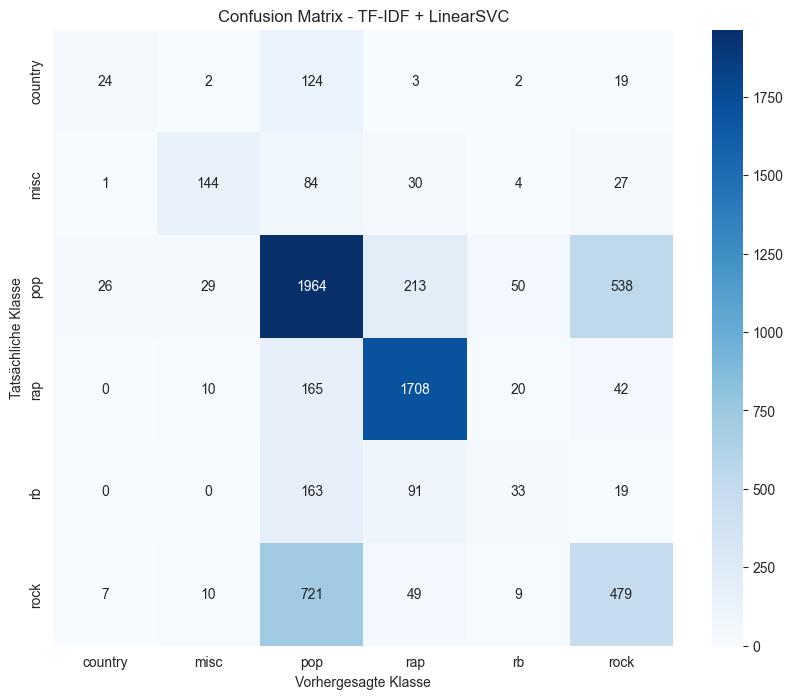

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=clf.classes_,
    yticklabels=clf.classes_
)
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Confusion Matrix - TF-IDF + LinearSVC")
plt.show()



TF-IDF ist nun ausgereizt. Kaum  grässere Verbesserung.

✅ TF-IDF + LinearSVC (aktueller Stand)

Sehr gute Gesamtaccuracy (0.64)

pop und rap werden richtig gut erkannt

Schwachstellen bleiben: country & rb (Recall 0.14 / 0.11)

BERT kann semantische Muster erkennen
→ Sarkasmus
→ Slang
→ Metaphern
→ Narrative Muster (storytelling vs. Punchlines vs. Love Songs)
TF-IDF sieht nur Wörter.
BERT versteht Inhalt.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

log_reg = LogisticRegression(
    C=1.0,
    class_weight='balanced',
    max_iter=1000,
    solver='liblinear',
    multi_class='ovr'
)

log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

print("LogReg Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogReg Balanced accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred_lr))


C:\Users\pelle\SynologyDrive\Docs\Studium\FHGR\Semester_3_HS24\Text Analytics\NLP\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogReg Accuracy: 0.6472834067547724
LogReg Balanced accuracy: 0.4754412070933138

Classification report:

              precision    recall  f1-score   support

     country       0.40      0.23      0.29       174
        misc       0.68      0.53      0.60       290
         pop       0.62      0.73      0.67      2820
         rap       0.82      0.87      0.84      1945
          rb       0.26      0.16      0.20       306
        rock       0.48      0.34      0.40      1275

    accuracy                           0.65      6810
   macro avg       0.54      0.48      0.50      6810
weighted avg       0.63      0.65      0.63      6810



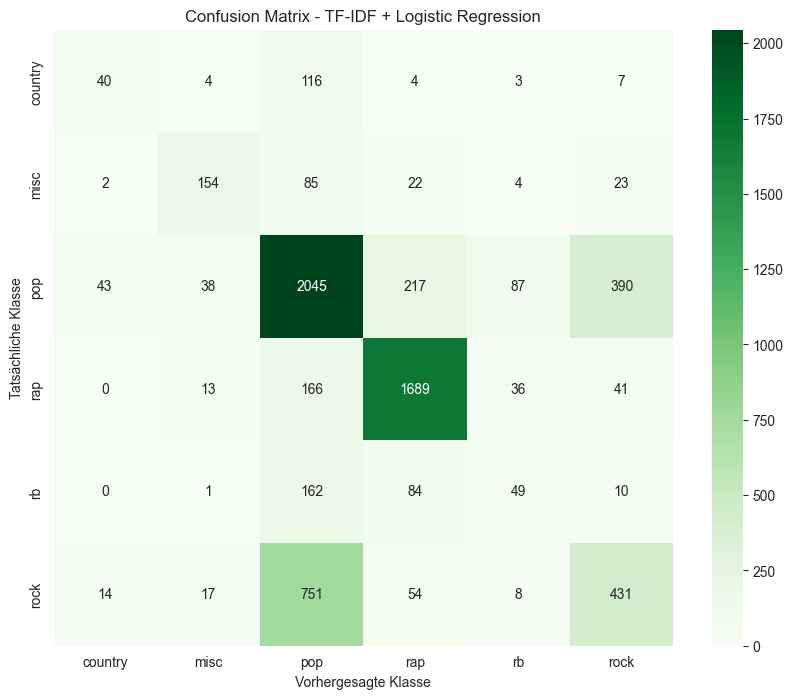

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix berechnen
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=log_reg.classes_)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap="Greens",
    xticklabels=log_reg.classes_,
    yticklabels=log_reg.classes_
)
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Confusion Matrix - TF-IDF + Logistic Regression")
plt.show()
